In [161]:
# Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [162]:
import pandas as pd

# Read the CSV files
df = pd.read_csv('london_bike_stations.csv')
df_drop = df.drop(columns=['Unnamed: 0', 'latitude', 'longitude'])

df1 = pd.read_csv('london_uk_yelp.csv')
df1_drop = df1.drop(columns=['Unnamed: 0', 'alias', 'categories', 'attributes.waitlist_reservation', 'attributes.open24_hours', 'attributes.menu_url',
                            'attributes.business_temp_closed', 'location.display_address', 'location.state', 'location.country', 'image_url', 'is_closed'
                            , 'transactions', 'coordinates.latitude', 'display_phone', 'coordinates.longitude', 'location.address1', 'location.address2', 'location.address3',
                            'location.zip_code', 'location.city', 'price', 'phone'])

# Drop unnecessary columns from df1

# Merge the DataFrames
combined_df = pd.merge(df_drop, df1_drop, on=['id'], how='outer')

# Display the first 5 rows of the combined DataFrame
combined_df.head()


,empty_slots,free_bikes,id,name_x,name_y,url,review_count,rating,distance
0,8.0,9.0,7f3020118e56165ed8b2f61899edb971,"001023 - River Street , Clerkenwell",NaN,NaN,NaN,NaN,NaN
1,23.0,12.0,67e6c16bce05410ba4b1f0f5000726ea,"001018 - Phillimore Gardens, Kensington",NaN,NaN,NaN,NaN,NaN
2,2.0,15.0,26184215d38089fcad213ef222e69780,"001024 - Park Street, Bankside",NaN,NaN,NaN,NaN,NaN
3,14.0,10.0,1eabd7ac8e781befd03f52ef56a18aa7,"001022 - Brunswick Square, Bloomsbury",NaN,NaN,NaN,NaN,NaN
4,14.0,30.0,23efb32f80a9dcd0e4f61fb44b353ce1,"000980 - Malet Street, Bloomsbury",NaN,NaN,NaN,NaN,NaN


In [163]:
#Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered through this visualization.

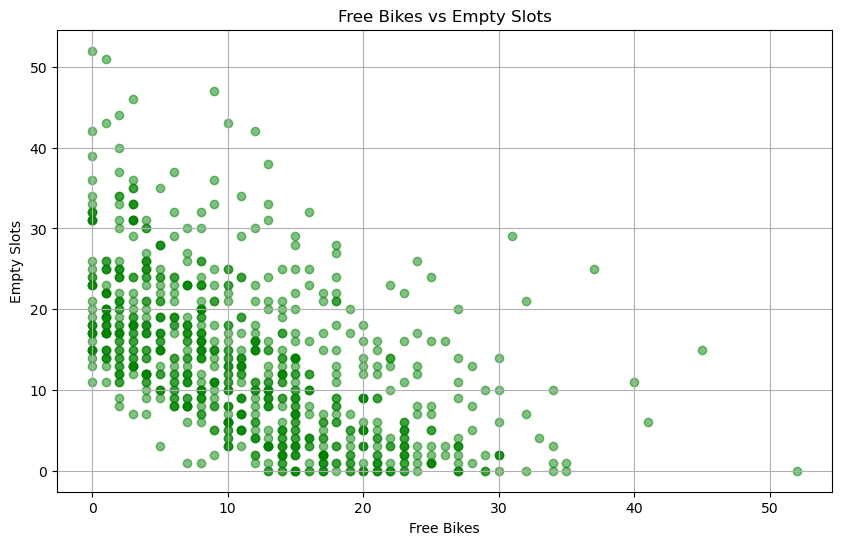

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df = pd.read_csv('london_bike_stations.csv')
df_drop = df.drop(columns=['Unnamed: 0', 'latitude', 'longitude'])

df1 = pd.read_csv('london_uk_yelp.csv')
df1_drop = df1.drop(columns=['Unnamed: 0', 'alias', 'categories', 'attributes.waitlist_reservation', 'attributes.open24_hours', 'attributes.menu_url',
                            'attributes.business_temp_closed', 'location.display_address', 'location.state', 'location.country', 'image_url', 'is_closed'
                            , 'transactions', 'coordinates.latitude', 'display_phone', 'coordinates.longitude', 'location.address1', 'location.address2', 'location.address3',
                            'location.zip_code', 'location.city', 'price', 'phone'])

# Merge the DataFrames
combined_df = pd.merge(df_drop, df1_drop, on=['id'], how='outer')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['free_bikes'], combined_df['empty_slots'], color='green', alpha=0.5)
plt.title('Free Bikes vs Empty Slots')
plt.xlabel('Free Bikes')
plt.ylabel('Empty Slots')
plt.grid(True)
plt.show()


In [ ]:
The visualization created, plots the relationship between the number of free bikes and empty slots at bike stations in London. Each point on the scatter plot represents a bike station, with the x-coordinate indicating the number of free bikes and the y-coordinate indicating the number of empty slots.

From this visualization, I can observe the following initial patterns or relationships:

Negative Correlation: There seems to be a negative correlation between the number of free bikes and empty slots. In other words, as the number of free bikes increases, the number of empty slots tends to decrease, and vice versa. This makes intuitive sense because as more bikes are taken by users, fewer bikes remain available at the station, resulting in more empty slots.

Clusters: The scatter plot may reveal clusters or groups of bike stations with similar characteristics. Some clusters may represent stations with consistently high or low availability of bikes and empty slots. Identifying these clusters can provide insights into the distribution of bike availability across different areas in London.

Outliers: There may be outliers in the data, representing bike stations with unusually high or low availability of bikes and empty slots. These outliers could be due to various factors such as location, popularity, or operational issues.

Overall, this visualization provides a useful overview of the distribution of bike availability at stations in London and highlights potential areas for further analysis or investigation.

In [ ]:
#Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [173]:
import sqlite3
from sqlite3 import Error
import pandas as pd

df = pd.read_csv("london_bike_stations.csv")
df1 = pd.read_csv("london_uk_yelp.csv")

#Connect to the SQLite Database in Python:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [174]:
#Return a Connection:
connection = create_connection("london_bike_stations_and_yelp.sqlite")

Connection to SQLite DB successful


In [175]:
#Create Tables Function
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [180]:
#Create the Table for CitiBikes in London_Uk:
create_london_bike_table = """
CREATE TABLE IF NOT EXISTS london_bike_stations (
    empty_slots INTEGER,
    free_bikes INTEGER,
    citibike_id TEXT PRIMARY KEY NOT NULL,
    citibike_station TEXT
);
"""

In [181]:
#Create Table Query for CitiBikes:
execute_query(connection, create_london_bike_table)

Query executed successfully


In [187]:
#Create the Table for Yelp Locations in London:
create_london_yelp_table = """
CREATE TABLE IF NOT EXISTS london_yelp_locations (
    yelp_id TEXT,
    yelp_name TEXT,
    yelp_review_count INTEGER,
    yelp_rating FLOAT,
    citibike_id TEXT,
    FOREIGN KEY (yelp_id) REFERENCES london_bike_stations (yelp_id)
);
"""

In [188]:
#Create Table Query for Yelp Locations:
execute_query(connection, create_london_yelp_table)

Query executed successfully


In [208]:
#Import CitiBike to SQLite:
df_drop.to_sql('london_bike_stations', connection, if_exists = 'replace', index = False)

794

In [207]:
#Import Yelp to SQLite:
df1_drop.to_sql('london_yelp_locations', connection, if_exists = 'replace', index = False)

20

In [209]:
#Close Connection:
connection.close()

In [210]:
#Create Connection to SQLite:
connection = create_connection("london_bike_stations_and_yelp.sqlite")

Connection to SQLite DB successful


In [193]:
#Select Records Function: 
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [221]:
#Select All from Bike Table limited to 5 rows:
select_london_bike_stations = "SELECT * from london_bike_stations limit 10"
london_bike_stations = execute_read_query(connection, select_london_bike_stations)

for london_bike_stations in london_bike_stations:
    print(london_bike_stations)

(8, 9, '7f3020118e56165ed8b2f61899edb971', '001023 - River Street , Clerkenwell')
(23, 12, '67e6c16bce05410ba4b1f0f5000726ea', '001018 - Phillimore Gardens, Kensington')
(2, 15, '26184215d38089fcad213ef222e69780', '001024 - Park Street, Bankside')
(14, 10, '1eabd7ac8e781befd03f52ef56a18aa7', '001022 - Brunswick Square, Bloomsbury')
(14, 30, '23efb32f80a9dcd0e4f61fb44b353ce1', '000980 - Malet Street, Bloomsbury')
(19, 1, '4c4028fef9930764b34cc63c411cd29f', '001010 - Cartwright Gardens , Bloomsbury')
(3, 22, '55f4dfcaf7fe3970b8722067a12b2f7f', '001007 - Drury Lane, Covent Garden')
(24, 4, 'ebe16a8a0722ff26b583e2bda9cd1af4', '001009 - Taviton Street, Bloomsbury')
(15, 13, 'd68d55f9fc5a6ecc846d4e51d9bab5bd', '000993 - Drummond Street , Euston')
(11, 8, '0c01f449802222cdd504c8eafa0322a4', '001019 - Ampton Street , Clerkenwell')


In [218]:
#Select All from Yelp Table limited to 5 rows:
select_london_yelp_locations = "SELECT * from london_yelp_locations limit 2"
london_yelp_locations = execute_read_query(connection, select_london_yelp_locations)

for london_yelp_location in london_yelp_locations:
    print(london_yelp_location)

('vlq4D26p_143Tj21OF-iMA', 'Dishoom', 'https://www.yelp.com/biz/dishoom-london-2?adjust_creative=3Hby0XniStF519qjv3IVIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=3Hby0XniStF519qjv3IVIg', 666, 4.5, 661.5153860363383)
('P33NBF3mTAgFYLmtMljuzg', 'Flight Club', 'https://www.yelp.com/biz/flight-club-london?adjust_creative=3Hby0XniStF519qjv3IVIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=3Hby0XniStF519qjv3IVIg', 34, 4.3, 158.72369796389577)


In [233]:
#Apply Join Function:
combine_tables = """
SELECT *
FROM
    london_bike_stations
FULL OUTER JOIN london_yelp_locations
    ON london_bike_stations.id = london_yelp_locations.id
LIMIT 5
"""

call_join = execute_read_query(connection, combine_tables)

for join in call_join:
    print(join)

(8, 9, '7f3020118e56165ed8b2f61899edb971', '001023 - River Street , Clerkenwell', None, None, None, None, None, None)
(23, 12, '67e6c16bce05410ba4b1f0f5000726ea', '001018 - Phillimore Gardens, Kensington', None, None, None, None, None, None)
(2, 15, '26184215d38089fcad213ef222e69780', '001024 - Park Street, Bankside', None, None, None, None, None, None)
(14, 10, '1eabd7ac8e781befd03f52ef56a18aa7', '001022 - Brunswick Square, Bloomsbury', None, None, None, None, None, None)
(14, 30, '23efb32f80a9dcd0e4f61fb44b353ce1', '000980 - Malet Street, Bloomsbury', None, None, None, None, None, None)
